Klasse P
Mittelwert: 0.9212081616238259
Varianz: 0.24444959302401736
Klasse N
Mittelwert: -0.13505485189515715
Varianz: 0.194316850735811


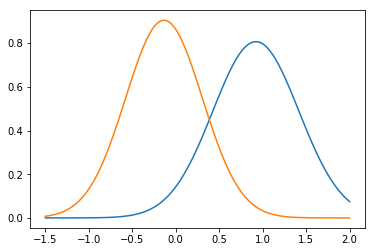

Tests: 921 Erfolge: 838 Erfolgsrate: 0.9098805646036916


In [200]:
import numpy as np
import random as rn
import pylab
from numpy.linalg import pinv
from numpy.linalg import inv
from numpy.linalg import norm
from sklearn.cross_validation import train_test_split

def getData():
    file = open("res/spambase.data", "r") 
    Data=[]    
    for line in file:
        floatLine = []
        tmpLine = line.split(',')
        Linelen = len(tmpLine)            
        for i in range(0,Linelen):
            floatLine.append(float(tmpLine[i]))            
        Data.append(floatLine)                
    file.closed   
    return Data

def MittelPunktVector(VecList):    
    M = np.array(VecList[0])
    n = len(VecList)    
    for i in range(1,n):
        tmpVec = np.array(VecList[i])
        M = M + tmpVec
    M = M / (n) 
    return M

def getKovarianzMatrix(Data, M):  
    n = len(Data)    
    x = np.matrix(Data[0])
    X = np.transpose((x - M)) @ (x - M)   
    for i in range(1,n):        
        x = np.matrix(Data[i])
        tmpX = np.transpose((x - M)) @ (x - M)        
        X = X + tmpX        

    return (X / n)

def gauß(x, mean ,var):
    return (1 / np.sqrt(2 * np.pi * var )) * np.exp( -((x - mean)**2/(2 * var)))


data = getData()

TrainVecsP = getVectors(1, data)
TrainVecsN = getVectors(0, data)

TrainVecsP ,TestVecsP = train_test_split(TrainVecsP,test_size=0.2)
TrainVecsN ,TestVecsN = train_test_split(TrainVecsN,test_size=0.2)

mu_p = MittelPunktVector(TrainVecsP)
mu_n = MittelPunktVector(TrainVecsN)

kov_p = getKovarianzMatrix(TrainVecsP, mu_p)
kov_n = getKovarianzMatrix(TrainVecsN, mu_n)

alpha = inv((kov_p + kov_n)) @ np.transpose(mu_p - mu_n)
alpha = alpha/norm(alpha)
alpha = np.transpose(alpha)


var_p = float(np.transpose(alpha) @ kov_p @ alpha)
var_n = float(np.transpose(alpha) @ kov_n @ alpha)

mu_p_projected = float(np.dot(mu_p,alpha))
mu_n_projected = float(np.dot(mu_n,alpha))

print("Klasse P")
print("Mittelwert: " + str(mu_p_projected))
print("Varianz: " + str(var_p))

print("Klasse N")
print("Mittelwert: " + str(mu_n_projected))
print("Varianz: " + str(var_n))



x = np.linspace(-1.5,2,100)
y = gauß(x, mu_p_projected, var_p)
pylab.plot(x,y)


x = np.linspace(-1.5,2,100)
y = gauß(x, mu_n_projected, var_n)
pylab.plot(x,y)

pylab.show()


success = 0

tests = len(TestVecsP) + len(TestVecsN)

for vector in TestVecsP:
    proj_vector = float(np.dot(vector,alpha))
    prob_p = gauß(proj_vector, mu_p_projected, var_p)
    prob_n = gauß(proj_vector, mu_n_projected, var_n)
    if(prob_p > prob_n):
        success += 1

for vector in TestVecsN:
    proj_vector = float(np.dot(vector,alpha))
    prob_p = gauß(proj_vector, mu_p_projected, var_p)
    prob_n = gauß(proj_vector, mu_n_projected, var_n)
    if(prob_n > prob_p):
        success += 1

print("Tests: " + str(tests) + " Erfolge: " + str(success) + " Erfolgsrate: " + str(success/tests))
